In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
receitas = pd.read_csv(
    '../DADOS/RECEITAS_MENSAIS_2023.csv',
    sep=";"
)

In [3]:
despesas = pd.read_csv(
    '../DADOS/DESPESAS_MENSAIS_2023.csv',
    sep=";"
)

In [4]:
receitas

,MESES,VALORES,N
0,6,"R$ 62.409,18",43
1,7,"R$ 62.409,18",43
2,8,"R$ 57.728,49",40
3,9,"R$ 40.786,87",33
4,10,"R$ 40.786,87",33


In [5]:
despesas

,MESES,VALORES,N
0,6,"R$58.136,22",43
1,7,"R$73.274,51",43
2,8,"R$74.271,44",40
3,9,"R$64.923,11",33
4,10,"R$55.771,65",33


In [6]:
def converter_moeda(entrada):
    saida = (
        entrada.replace('R$', '')
        .replace('.','')
        .replace(',','.')
        .replace(' ','')
    )
    return float(saida)
        

In [7]:
receitas['VALORES'] = receitas['VALORES'].map(converter_moeda)
receitas

,MESES,VALORES,N
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


In [8]:
despesas['VALORES'] = despesas['VALORES'].map(converter_moeda)
despesas

,MESES,VALORES,N
0,6,58136.22,43
1,7,73274.51,43
2,8,74271.44,40
3,9,64923.11,33
4,10,55771.65,33


In [9]:
saldo = receitas.copy()
saldo.columns = ['MESES', 'RECEITAS', 'N']
saldo['DESPESAS'] = despesas['VALORES']
saldo['saldo'] = saldo['RECEITAS']-saldo['DESPESAS']

In [10]:
saldo

,MESES,RECEITAS,N,DESPESAS,saldo
0,6,62409.18,43,58136.22,4272.96
1,7,62409.18,43,73274.51,-10865.33
2,8,57728.49,40,74271.44,-16542.95
3,9,40786.87,33,64923.11,-24136.24
4,10,40786.87,33,55771.65,-14984.78


In [11]:
 # prejuízo acumulado
saldo[saldo['saldo']<0]['saldo'].sum()

-66529.29999999999

In [12]:
alunos = pd.read_csv(
    '../DADOS/ALUNOS_ago.csv',
    sep=";"
)
alunos

,HORAS,VALOR
0,4,"1.130,37"
1,4,"964,3248503"
2,4,"964,885101"
3,4,"992,3709998"
4,4,"1.173,91"
5,4,"1023,957934"
6,4,0
7,5,"1.137,17"
8,6,"1.144,53"
9,6,"1.115,85"


In [13]:
alunos['HORAS'] = alunos['HORAS'].map(converter_moeda)
alunos['VALOR'] = alunos['VALOR'].map(converter_moeda)
alunos

,HORAS,VALOR
0,4.0,1130.370000
1,4.0,964.324850
2,4.0,964.885101
3,4.0,992.371000
4,4.0,1173.910000
5,4.0,1023.957934
6,4.0,0.000000
7,5.0,1137.170000
8,6.0,1144.530000
9,6.0,1115.850000


In [14]:
plano = pd.read_csv('../DADOS/PLANO_MENSALIDADES_2023.csv',
                   sep=';')
plano.dtypes

HORAS       int64
VALORES    object
dtype: object

In [15]:
plano

,HORAS,VALORES
0,4,"R$ 1.339,58"
1,6,"R$ 1.666,43"
2,8,"R$ 1.874,48"
3,10,"R$ 2.314,47"
4,12,"R$ 2.684,79"


In [16]:
plano['VALORES'] = plano['VALORES'].map(converter_moeda)
plano

,HORAS,VALORES
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [17]:
plano.rename(columns={'VALORES': "valore_tabelados"})

,HORAS,valore_tabelados
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [18]:
plano['HORAS'] = plano['HORAS'].astype(float)
plano.dtypes

HORAS      float64
VALORES    float64
dtype: object

In [19]:
comp = alunos.merge(plano, left_on='HORAS', right_on='HORAS', how='left')

In [20]:
comp = comp.set_index('HORAS')

In [21]:
comp = comp.interpolate(method='index')

In [22]:
comp

,VALOR,VALORES
HORAS,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [23]:
comp = comp.rename(columns={'VALOR':'PAGO' ,'VALORES':'TABELADO'})

In [24]:
comp

,PAGO,TABELADO
HORAS,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [25]:
comp = comp[comp['PAGO'] != 0]

In [26]:
comp

,PAGO,TABELADO
HORAS,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300
6.0,1115.850000,1666.4300


In [27]:
5*comp['TABELADO'].sum()-despesas['VALORES'].sum()

52084.95749999996

In [29]:
receitas

,MESES,VALORES,N
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


Text(0.5, 1.0, 'Comparação entre receitas e despesas')

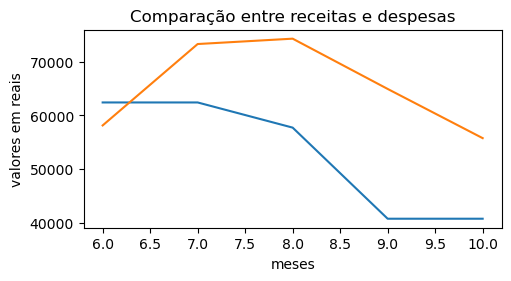

In [33]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(receitas['MESES'], receitas['VALORES'], label='receitas') 
ax.plot(despesas['MESES'], despesas['VALORES'], label='despesas')  
# ax.plot(x, x**3, label='tabelado')
ax.set_xlabel('meses')  
ax.set_ylabel('valores em reais')  
ax.set_title('Comparação entre receitas e despesas') 
#ax.legend() 

In [56]:
# cálculo da mensalidade tabelada média
comp['TABELADO'].mean()

2045.7399324324322

In [57]:
# cálculo da mensalidade paga média
comp['PAGO'].mean()

1560.2353752729728

In [64]:
receitas['tabelado'] = [
                        comp['TABELADO'].sum()+ 3*comp['TABELADO'].mean(),  # mes 6 - 43
                        comp['TABELADO'].sum()+ 3*comp['TABELADO'].mean(),  # mes 7 - 43
                        comp['TABELADO'].sum(),                            # mes 8 - 40
                        comp['TABELADO'].sum()-10*comp['TABELADO'].mean(), # mes 9 - 33
                        comp['TABELADO'].sum()-10*comp['TABELADO'].mean() # mes 10 - 33666
                        ] 

In [65]:
receitas

,MESES,VALORES,N,tabelado
0,6,62409.18,43,81829.597297
1,7,62409.18,43,81829.597297
2,8,57728.49,40,75692.377500
3,9,40786.87,33,55234.978176
4,10,40786.87,33,55234.978176


In [66]:
# soma da receitas possíveis
receitas['tabelado'].sum()

349821.5284459459

In [72]:
# soma das despesas
despesas['VALORES'].sum()

326376.93

In [71]:
# soma da receitas reais
receitas['VALORES'].sum()

264120.59

In [73]:
# prejuízo real dos 5 meses
receitas['VALORES'].sum()-despesas['VALORES'].sum()

-62256.33999999997

In [74]:
# lucro possível dos 5 meses
receitas['tabelado'].sum()-despesas['VALORES'].sum()

23444.598445945885